In [2]:
from os import path
import numpy as np
import matplotlib.pyplot as plt
from monte_carlo import kMarcus_gu, dipole_coupling


nsample = 150

percolate_datadir = f'/Users/nico/Desktop/simulation_outputs/percolation/40x40/percolate_output/sample-{nsample}/'
M = np.load(f'/Users/nico/Desktop/simulation_outputs/percolation/40x40/MOs_ARPACK/MOs_ARPACK_bigMAC-{nsample}.npy')
MO_energies = np.load(f'/Users/nico/Desktop/simulation_outputs/percolation/40x40/eARPACK/eARPACK_bigMAC-{nsample}.npy')
strucdir = '/Users/nico/Desktop/simulation_outputs/percolation/40x40/structures/'
print(M.shape)

centers = np.load(percolate_datadir + 'cc.npy')
site_energies = np.load(percolate_datadir + 'ee.npy')
site_inds = np.load(percolate_datadir + 'ii.npy')

sites_data = (centers, site_energies, site_inds)

gamL = np.load(percolate_datadir + f'gamL_40x40-{nsample}.npy')
gamR = np.load(percolate_datadir + f'gamR_40x40-{nsample}.npy')

MO_gams = (gamL, gamR)

pos = np.load(f'pos-{nsample}_nodangle.npy')

np.save(f'pos-{nsample}_nodangle.npy', pos)

temps = np.arange(100,300,100,dtype=np.float64)

dX = np.max(pos[:,0]) - np.min(pos[:,1])

E = np.array([1.0,0]) / dX # Efield corresponding to a voltage drop of 1V accross MAC sample 
e_reorg = 0.005


Js = dipole_coupling(M,pos,site_inds)
np.save(f"/Users/nico/Desktop/simulation_outputs/percolation/40x40/monte_carlo/dipole_couplings/Jdip-{nsample}.npy", Js)



# dE = site_energies[None,:] - site_energies[:,None]
# #dE[np.abs(dE) == 0] = 1e-6



K = kMarcus_gu(site_energies,centers,0.01,Js,100,np.array([1,0]))


(57778, 122)
Entering triple for-loop...
Done!


NameError: name 'L' is not defined

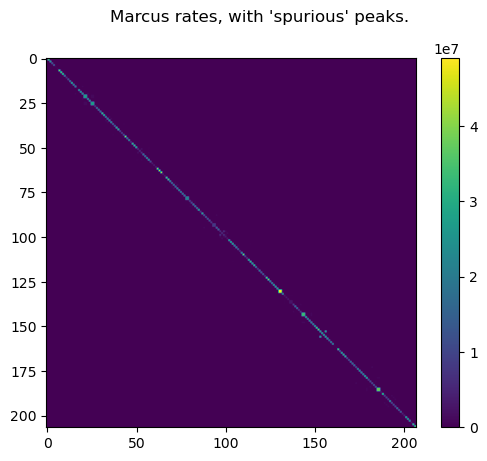

In [4]:
plt.imshow(K)
plt.suptitle("Marcus rates, with 'spurious' peaks.")
plt.colorbar()
plt.show()

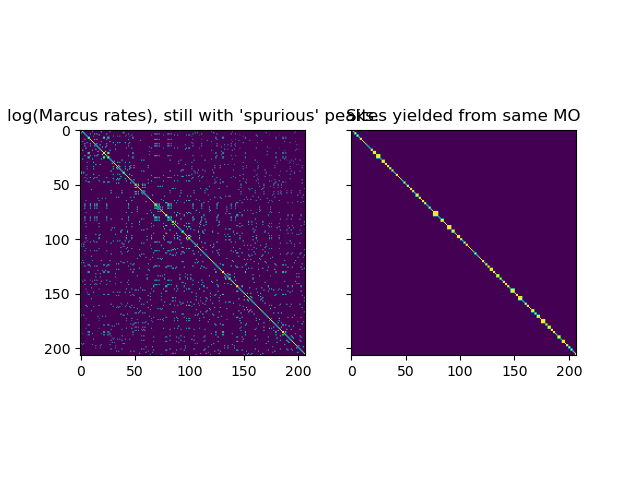

In [21]:
%matplotlib widget
fig, axs = plt.subplots(1,2,sharey=True)

axs[0].imshow(np.log(K+0.001))
axs[0].set_title("log(Marcus rates), still with 'spurious' peaks.")


same_MO = site_inds == site_inds[:,None]

axs[1].imshow(same_MO)
axs[1].set_title("Sites yielded from same MO")

plt.show()

/var/folders/gt/qhbvbx5d1hv7mm6w7y4738c40000gn/T/ipykernel_25988/2306128022.py:8: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(K[i,:]),label=f"{i}")
/var/folders/gt/qhbvbx5d1hv7mm6w7y4738c40000gn/T/ipykernel_25988/2306128022.py:8: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(K[i,:]),label=f"{i}")
/var/folders/gt/qhbvbx5d1hv7mm6w7y4738c40000gn/T/ipykernel_25988/2306128022.py:8: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(K[i,:]),label=f"{i}")
/var/folders/gt/qhbvbx5d1hv7mm6w7y4738c40000gn/T/ipykernel_25988/2306128022.py:8: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(K[i,:]),label=f"{i}")
/var/folders/gt/qhbvbx5d1hv7mm6w7y4738c40000gn/T/ipykernel_25988/2306128022.py:8: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(K[i,:]),label=f"{i}")


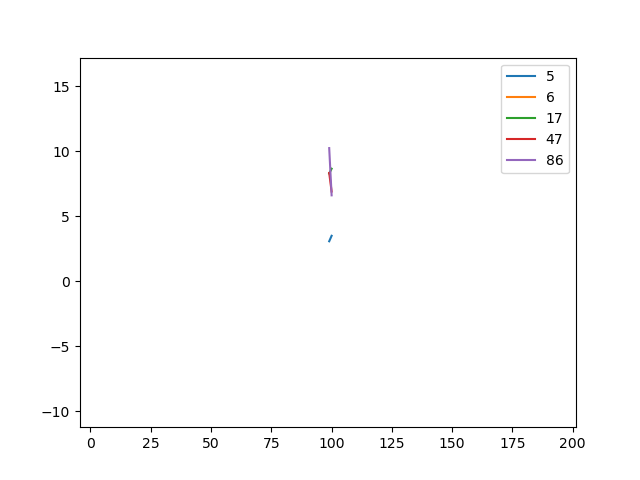

In [22]:
from percolate import LR_sites_from_MOgams

L, R = LR_sites_from_MOgams(gamL, gamR, site_inds)

plt.figure()

for i in L[:5]:
    plt.plot(np.log(K[i,:]+1e-6),label=f"{i}")
plt.legend()
plt.show()